# Text Classification with `AdaBoost, LinearSVC` & `LogisticRegression`
 
#### By: Tu My DOAN & Sali Dauda MOHAMNMED

## Libraries

In [10]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from xml.dom import minidom
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline

### Train Data Loading

In [2]:
train = pd.read_csv('news_datafile.csv')
train_new = train.dropna()
train_new.head()

,id,file,label,content
0,1,1.xml,0,Showers continued throughout the week in\nthe ...
1,2,2.xml,0,Standard Oil Co and BP North America\nInc said...
2,3,3.xml,0,Texas Commerce Bancshares Inc's Texas\nCommerc...
3,4,4.xml,0,BankAmerica Corp is not under\npressure to act...
4,5,5.xml,0,The U.S. Agriculture Department\nreported the ...


### Test Data Loading

In [3]:
df_test = pd.read_csv("./dmdata/test.csv")
df_test.head()
def read_xml(xml_list):
    empty_content = []
    df = pd.DataFrame(columns=['content','file'])
    for file_name in xml_list:
        mydoc = minidom.parse("./dmdata/"+file_name)
        items = mydoc.getElementsByTagName('BODY')
        if items[0].firstChild != None:
            content = items[0].firstChild.data
            df = df.append({'content':content, 'file':file_name},ignore_index=True)
        else: 
            empty_content.append(str(file_name))
            df = df.append({'content':"", 'file':file_name},ignore_index=True)
    return df, empty_content
empty_content_lst = []
df_xml, empty_content_lst = read_xml(df_test.file.values)
df_xml.head()

,content,file
0,Legislation to require disclosure of\ncredit c...,20.xml
1,"inflation\nplan, initially hailed at home and ...",47.xml
2,The Commodity Credit Corporation (CCC)\nannoun...,57.xml
3,"Shr 27 cts vs 29 cts\n Net 13,555,000 vs 14...",66.xml
4,Sorg Inc said a group composed of\none-third o...,88.xml


### Splitting data for training

In [4]:
X_train, X_valid, y_train, y_valid = train_test_split(train_new.content, train_new.label, 
                                                      test_size=0.2, random_state=123)

## Train model

In [12]:
def print_cmx(y_true, y_pred):
    lbl = sorted(list(set(y_true)))
    cm = confusion_matrix(y_true,y_pred)
    df = pd.DataFrame(cm, index=lbl, columns=lbl)
    plt.figure(figsize = (5,4))
    sn.heatmap(df, annot=True,cmap='Blues', fmt='g')
    plt.show()

In [13]:
# Ref: [1]
def train_model(classifier, train_data, train_label, valid_data, valid_label):
    text_clf = Pipeline([
    ('vect', CountVectorizer(analyzer='word',stop_words='english', max_features=1000)),
    ('tfidf', TfidfTransformer()),
    ('clf', classifier),
    ])
    text_clf.fit(train_data, train_label)
    predicted = text_clf.predict(valid_data)
    print()
    print("Accuracy: {0:.3f}%\n".format(accuracy_score(valid_label,predicted)*100))
    print("Confusion matrix:")
    print_cmx(valid_label,predicted)
    return text_clf

### `LinearSVC`


Accuracy: 96.935%

Confusion matrix:


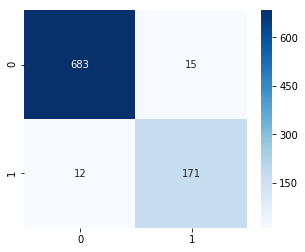

In [14]:
text_clf_svc = train_model(LinearSVC(random_state=123),X_train, y_train, X_valid, y_valid)

### `AdaBoostClassifier`


Accuracy: 95.800%

Confusion matrix:


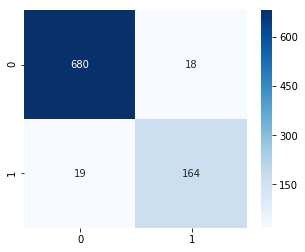

In [15]:
text_clf_ada = train_model(AdaBoostClassifier(n_estimators=30, random_state=123),X_train, y_train, X_valid, y_valid)

### `LogisticRegression`


Accuracy: 96.595%

Confusion matrix:


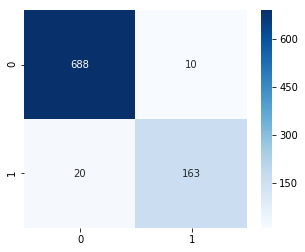

In [16]:
text_clf_lr = train_model(LogisticRegression(solver='lbfgs', random_state=123),X_train, y_train, X_valid, y_valid)

## Predict on test data

In [17]:
y_pred_test = text_clf_svc.predict(df_xml.content)

Below is the count for each label:
- Label `1`: 50 items
- Label `0`: 150 items

In [18]:
len(y_pred_test[y_pred_test==True]),len(y_pred_test[y_pred_test==False])

(50, 150)

### Write test prediction to file

In [19]:
test_result_df = df_test
for index, value in enumerate(y_pred_test):
    if value == True:
        test_result_df.iloc[[index],2:] = 1
    else: test_result_df.iloc[[index],2:] = 0

In [20]:
test_result_df.to_csv('svc_test_results.csv',index=False)

# References

1. Working with Text data from `sklearn` - https://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html